## Packages

In [1022]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

## Data Loading

In [1042]:
df = pd.read_excel("airpoll spreadsheet.xlsx")
df

,SO2,NO2,O3,PM2.5,PM10
0,12.066771,26.209577,50.274385,30.133367,49.601856
1,9.960118,26.414410,50.725530,39.431072,63.532406
2,13.042188,28.175000,59.656341,30.048178,51.604358
3,14.110423,30.427946,45.042525,35.744039,59.892717
4,16.469369,25.970691,46.352582,22.802231,39.986833
...,...,...,...,...,...
3342,12.821386,29.930362,45.131497,28.474811,46.540878
3343,14.980377,30.627038,47.514893,31.570400,49.137089
3344,10.085431,27.854523,57.197097,38.671100,52.522028
3345,9.124214,28.639587,43.391786,28.505417,48.034397


In [1044]:
df.shape #We have 3347 rows and 5 columns

(3347, 5)

In [1046]:
df.info() #All records have values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO2     3347 non-null   float64
 1   NO2     3347 non-null   float64
 2   O3      3347 non-null   float64
 3   PM2.5   3347 non-null   float64
 4   PM10    3347 non-null   float64
dtypes: float64(5)
memory usage: 130.9 KB


In [1048]:
df.isnull().sum() #We have zero null values

SO2      0
NO2      0
O3       0
PM2.5    0
PM10     0
dtype: int64

In [1050]:
df_duplicates = (df.duplicated() == True).sum() #We have zero duplicates
df_duplicates

0

## Data (Variable) Description
All the attributes are numerical and therefore the basic statics of the dataset is shown below.

In [1056]:
df.dtypes #All our variables are data types

SO2      float64
NO2      float64
O3       float64
PM2.5    float64
PM10     float64
dtype: object

In [1058]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SO2,3347.0,15.457743,7.958836,2.440214,9.822467,13.668863,19.211052,63.565143
NO2,3347.0,30.233894,9.840362,5.313647,23.342326,28.622035,35.268649,80.808551
O3,3347.0,49.046178,13.678701,14.307370,38.955383,47.986737,57.857050,103.912130
PM2.5,3347.0,30.840341,10.881794,7.247189,23.265236,29.131225,36.256992,80.611000
PM10,3347.0,53.068965,19.495417,12.460333,39.293278,49.776500,63.601911,131.746833


## Variable Correlation
As can be seen in the correlation heatmap below, the strongest correlation is 0.87 between PM2.5 and PM10 whilst the weakest correlation is -0.37 of which its between every attribute that is correlated with O3.

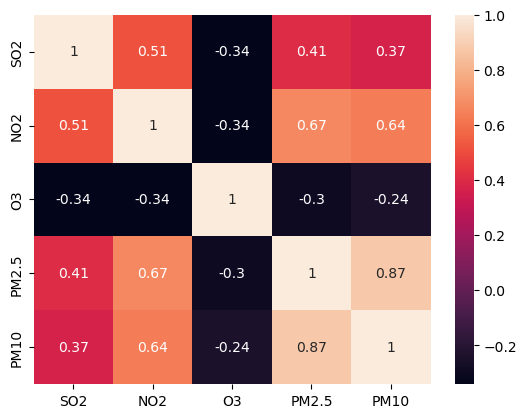

In [1062]:
correlation = df[["SO2", "NO2", "O3", "PM2.5", "PM10"]].corr()
# correlation
sns.heatmap(correlation, annot=True)
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")

## Distribution of pollutants

### Distribution of SO2
Based on the sulfur dioxide distribution below, the concentration values of this pollutant starts at 3 - 65 µg/m³ of which the most common concentration is between 9 - 15 µg/m³ and the least common concentration is towards the upper 60 µg/m³. This distribution is skewed to the right as most of the concentration is in the lower end meaning towards the higher values there is less occurrence.

Mean of SO2 is 15.457743337590784
Mean of SO2 is 63.56514276308346
Mean of SO2 is 2.440213630790989


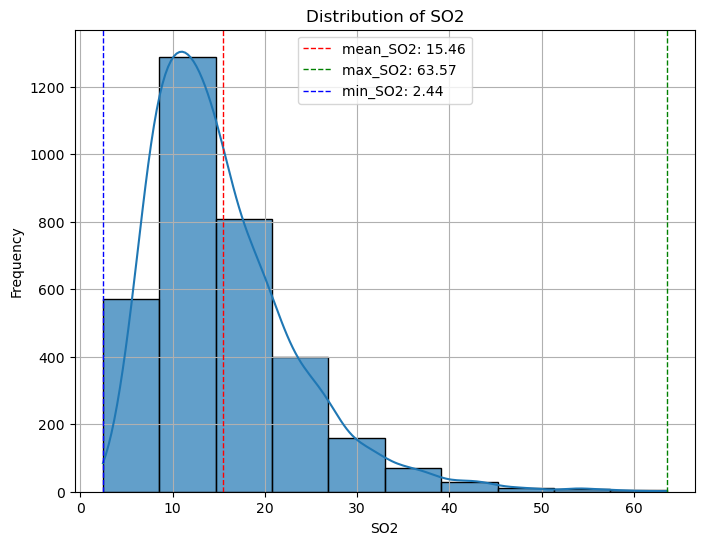

In [1064]:
mean_SO2 = df["SO2"].mean()
max_SO2 = df["SO2"].max()
min_SO2 = df["SO2"].min()
print(f"Mean of SO2 is {mean_SO2}")
print(f"Mean of SO2 is {max_SO2}")
print(f"Mean of SO2 is {min_SO2}")

plt.figure(figsize=(8, 6))
sns.histplot(df["SO2"], bins=10, kde=True, edgecolor="black", alpha=0.7)
plt.axvline(mean_SO2, color="red", linestyle="dashed", linewidth=1, label=f"mean_SO2: {mean_SO2:.2f}")
plt.axvline(max_SO2, color="green", linestyle="dashed", linewidth=1, label=f"max_SO2: {max_SO2:.2f}")
plt.axvline(min_SO2, color="blue", linestyle="dashed", linewidth=1, label=f"min_SO2: {min_SO2:.2f}")
plt.title("Distribution of SO2")
plt.xlabel("SO2")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig("SO2.png", dpi=300, bbox_inches="tight")
plt.show()

### Distribution of NO2
Values of nitrogen dioxide(NO2) start at around 5 - 80 µg/m³. The distribution is slightly symmetrical but also distributed towards the right as there is less occurence of this concentration in the higher values in comparison to the lower values. The most popular concentration occurrence is between 20 - 35 µg/m³.

Mean of NO2 is 30.233894244840123
Mean of NO2 is 80.80855104042261
Mean of NO2 is 5.313646771305831


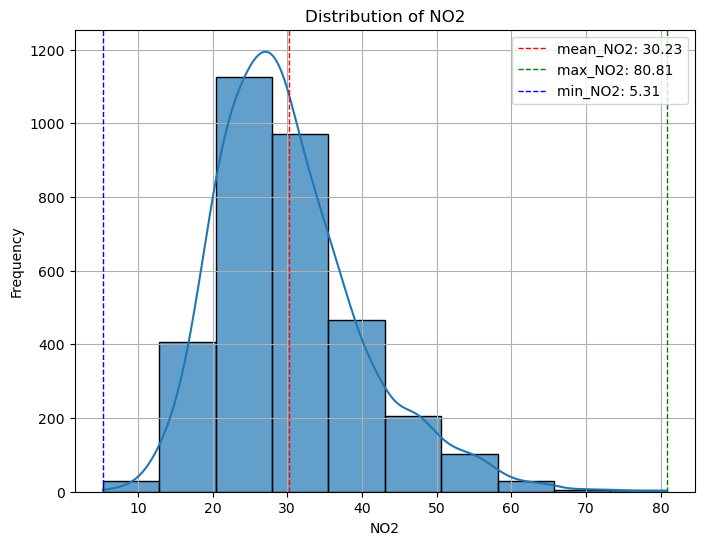

In [1068]:
mean_NO2 = df["NO2"].mean()
max_NO2 = df["NO2"].max()
min_NO2 = df["NO2"].min()
print(f"Mean of NO2 is {mean_NO2}")
print(f"Mean of NO2 is {max_NO2}")
print(f"Mean of NO2 is {min_NO2}")

plt.figure(figsize=(8, 6))
sns.histplot(df["NO2"], bins=10, kde=True, edgecolor="black", alpha=0.7)
plt.axvline(mean_NO2, color="red", linestyle="dashed", linewidth=1, label=f"mean_NO2: {mean_NO2:.2f}")
plt.axvline(max_NO2, color="green", linestyle="dashed", linewidth=1, label=f"max_NO2: {max_NO2:.2f}")
plt.axvline(min_NO2, color="blue", linestyle="dashed", linewidth=1, label=f"min_NO2: {min_NO2:.2f}")
plt.title("Distribution of NO2")
plt.xlabel("NO2")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")
plt.grid(True)
plt.savefig("NO2.png", dpi=300, bbox_inches="tight")
plt.show()

### Distribution of O3
The shape of the distribution is almost symmetrical as it resembles the normal distribution. This indicates that this pollutant's concentration occurrence is balanced between both the lower and higher values. The highest occurrence is between 40 - 60 µg/m³.

Mean of O3 is 49.046178308272864
Mean of O3 is 103.91212951869865
Mean of O3 is 14.307370410867014


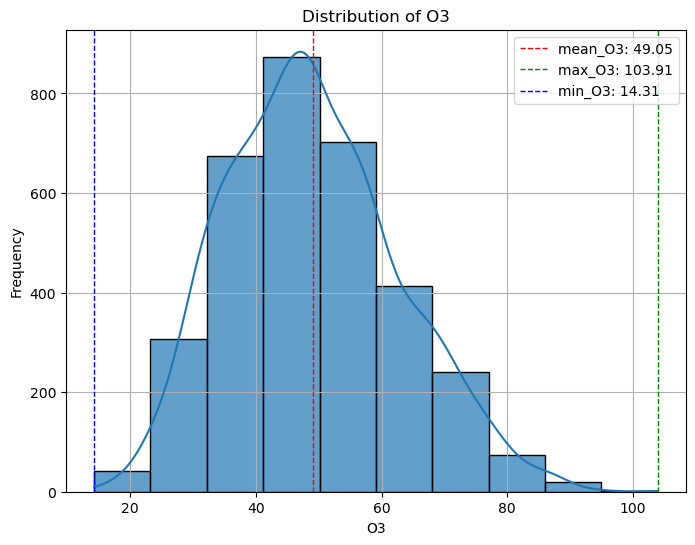

In [1070]:
mean_O3 = df["O3"].mean()
max_O3 = df["O3"].max()
min_O3 = df["O3"].min()
print(f"Mean of O3 is {mean_O3}")
print(f"Mean of O3 is {max_O3}")
print(f"Mean of O3 is {min_O3}")

plt.figure(figsize=(8, 6))
sns.histplot(df["O3"], bins=10, kde=True, edgecolor="black", alpha=0.7)
plt.axvline(mean_O3, color="red", linestyle="dashed", linewidth=1, label=f"mean_O3: {mean_O3:.2f}")
plt.axvline(max_O3, color="green", linestyle="dashed", linewidth=1, label=f"max_O3: {max_O3:.2f}")
plt.axvline(min_O3, color="blue", linestyle="dashed", linewidth=1, label=f"min_O3: {min_O3:.2f}")
plt.title("Distribution of O3")
plt.xlabel("O3")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")
plt.grid(True)
plt.savefig("O3.png", dpi=300, bbox_inches="tight")
plt.show()

### Distribution of PM2.5
The pollutants with particles that have a diameter that is less than or equal to 2.5 microns which are represented by this attribute PM2.5 have their occurence starting from around 7 - 80 µg/m³. The distribution of PM2.5 is skewed to the right with the most frequent occurence starting from 21 - 38 µg/m³.

Mean of PM2.5 is 30.840341243236068
Mean of PM2.5 is 80.61100000000002
Mean of PM2.5 is 7.247188888888889


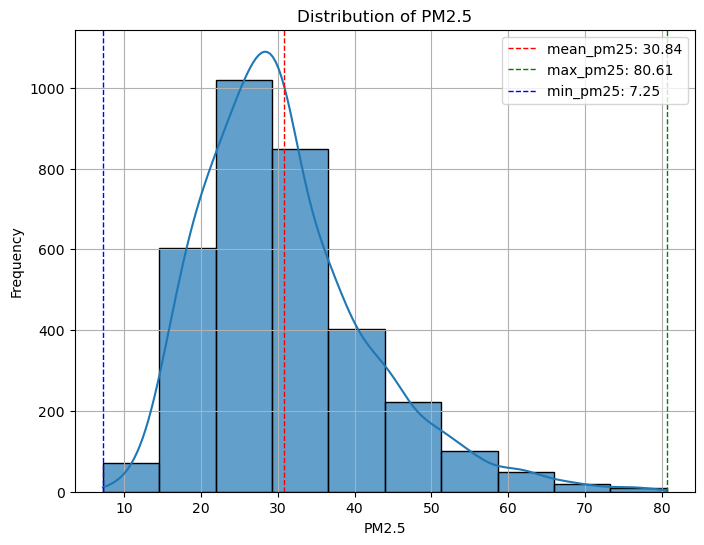

In [998]:
mean_pm25 = df["PM2.5"].mean()
max_pm25 = df["PM2.5"].max()
min_pm25 = df["PM2.5"].min()
print(f"Mean of PM2.5 is {mean_pm25}")
print(f"Mean of PM2.5 is {max_pm25}")
print(f"Mean of PM2.5 is {min_pm25}")

plt.figure(figsize=(8, 6))
sns.histplot(df["PM2.5"], bins=10, kde=True, edgecolor="black", alpha=0.7)
plt.axvline(mean_pm25, color="red", linestyle="dashed", linewidth=1, label=f"mean_pm25: {mean_pm25:.2f}")
plt.axvline(max_pm25, color="green", linestyle="dashed", linewidth=1, label=f"max_pm25: {max_pm25:.2f}")
plt.axvline(min_pm25, color="blue", linestyle="dashed", linewidth=1, label=f"min_pm25: {min_pm25:.2f}")
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")
plt.grid(True)
plt.show()

### Distribution of PM10
The particles that have a diameter that is equal to or less than 10 microns which are represented by this attribute PM10 have occurences starting from 12 - 131 µg/m³. The distribution of this attribute is skewed to the right and has the most frequent occurence between 38 - 60 µg/m³.

Mean of PM10 is 53.06896499684627
Mean of PM10 is 131.74683333333334
Mean of PM10 is 12.460333333333333


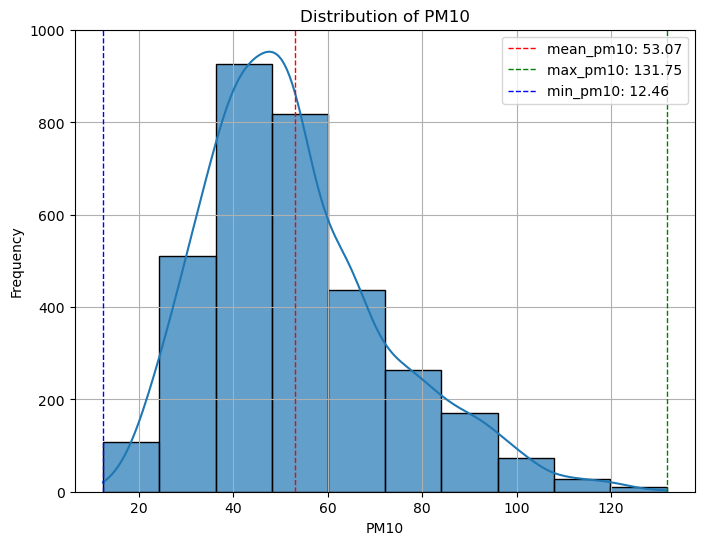

In [1000]:
mean_pm10 = df["PM10"].mean()
max_pm10 = df["PM10"].max()
min_pm10 = df["PM10"].min()
print(f"Mean of PM10 is {mean_pm10}")
print(f"Mean of PM10 is {max_pm10}")
print(f"Mean of PM10 is {min_pm10}")

plt.figure(figsize=(8, 6))
sns.histplot(df["PM10"], bins=10, kde=True, edgecolor="black", alpha=0.7)
plt.axvline(mean_pm10, color="red", linestyle="dashed", linewidth=1, label=f"mean_pm10: {mean_pm10:.2f}")
plt.axvline(max_pm10, color="green", linestyle="dashed", linewidth=1, label=f"max_pm10: {max_pm10:.2f}")
plt.axvline(min_pm10, color="blue", linestyle="dashed", linewidth=1, label=f"min_pm10: {min_pm10:.2f}")
plt.title("Distribution of PM10")
plt.xlabel("PM10")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")
plt.grid(True)
plt.show()

## Ideal Number of clusters
To determine the ideal number of clusters to use in our k means algorithm, a method called the elbow method will be implemented below. Before this, the dataframe utilized will be scaled first then the elbow method will follow.

In [1073]:
scaled_df = StandardScaler().fit_transform(df) #Scaling the dataframe so that all features have a balanced influenced on the model 
scaled_df

array([[-0.42612747, -0.40902143,  0.08980317, -0.06497828, -0.17786886],
       [-0.69086072, -0.38820275,  0.12278962,  0.78957704,  0.53679305],
       [-0.30355152, -0.20926076,  0.77578624, -0.07280802, -0.07513692],
       ...,
       [-0.67511321, -0.24183331,  0.59597303,  0.71972773, -0.02805885],
       [-0.79590481, -0.16204139, -0.41343379, -0.21460372, -0.25828225],
       [ 0.13761755,  0.12483886,  0.16990306,  0.02590599, -0.05272118]])

In [1075]:
K = range(1,12) #creating 12 clusters so that we can be able to assess which one is the best to choose
sse_score = [] #list of the sum of squared error

for k in K: #Iterating through our clusters
    kmeans = cluster.KMeans(n_clusters = k, init = "k-means++") #our algorithm with k number of clusters and an initialization of cluster centroids
    kmeans = kmeans.fit(scaled_df) #fitting the dataframe
    sse_score_iter = kmeans.inertia_ #getting the sum of squares error
    sse_score.append(sse_score_iter) #appending the sum of squares error to the list
print(sse_score)

[16735.0, 10408.57217518342, 8626.579015929694, 7511.1872210675765, 6636.099610873947, 6093.429515043198, 5607.122366787193, 5305.145736470599, 5047.7386985913345, 4865.508849530074, 4631.236755095662]


In [1077]:
centroids = pd.DataFrame({"Cluster" : K, "SSE_Score" : sse_score}) #Converting the sum of squares error to a dataframe
centroids

,Cluster,SSE_Score
0,1,16735.000000
1,2,10408.572175
2,3,8626.579016
3,4,7511.187221
4,5,6636.099611
5,6,6093.429515
6,7,5607.122367
7,8,5305.145736
8,9,5047.738699
9,10,4865.508850


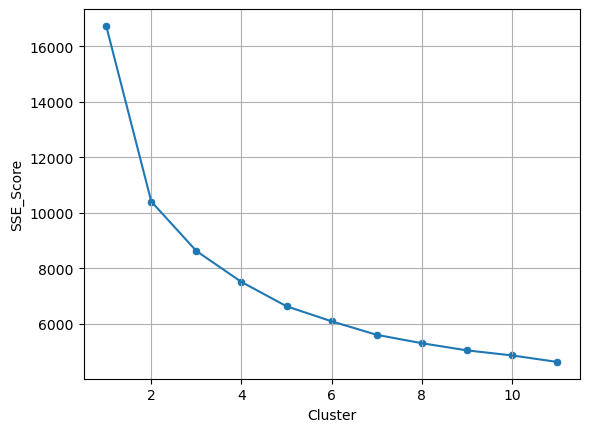

In [1079]:
#Lets create a SSE vs Cluster plot
sns.scatterplot(x="Cluster", y="SSE_Score", data = centroids, marker="o")
sns.lineplot(x="Cluster", y="SSE_Score", data = centroids)
plt.grid(True)
plt.savefig("sse.png", dpi=300, bbox_inches="tight")

## Process to execute K-means clustering
As can be seen in the plot above, the elbow is between cluster 2 and cluster 3. There is a huge SSE difference from the starting point to cluster 2 and then the SSE changes very slowly as the clusters increases. Therefore, the ideal number of clusters is 2 hence the SSE does not change drastically in comaparison to the beginning. 

In [1082]:
kmeans = cluster.KMeans(n_clusters = 2, init = "k-means++", random_state=42)
kmeans.fit(scaled_df)

KMeans(n_clusters=2, random_state=42)

In [1084]:
kmeans.cluster_centers_ #cluster centriods

array([[ 0.81035367,  1.08933528, -0.57813682,  1.11219537,  1.12774616],
       [-0.32685964, -0.43938807,  0.23319397, -0.44860878, -0.45488126]])

In [1086]:
predictions = kmeans.fit_predict(scaled_df)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [1095]:
df_columns = ["SO2", "NO2", "O3", "PM2.5", "PM10"]
scaled_df = pd.DataFrame(scaled_df, columns=df_columns) #converting the scaled dataset from a numpy array to a dataframe

scaled_df["cluster"] = predictions #Adding the cluster column that will determine which cluster does each record belongs to
scaled_df.head(15) #First 15 records

,SO2,NO2,O3,PM2.5,PM10,cluster
0,-0.426127,-0.409021,0.089803,-0.064978,-0.177869,1
1,-0.690861,-0.388203,0.122790,0.789577,0.536793,1
2,-0.303552,-0.209261,0.775786,-0.072808,-0.075137,1
3,-0.169311,0.019723,-0.292736,0.450701,0.350071,1
4,0.127126,-0.433301,-0.196948,-0.738786,-0.671137,1
5,0.380933,-0.420484,-0.311820,-0.616571,-0.550819,1
6,0.335455,0.020367,-0.139959,0.096138,0.117512,1
7,-0.322110,-0.093788,0.048727,0.197514,0.162451,1
8,0.045142,0.076262,0.152374,0.625792,0.535133,1
9,0.457962,-0.614235,-0.370263,0.111525,-0.075117,1


In [1097]:
scaled_df["cluster"].unique() #Verifying if we have only 2 clusters

array([1, 0])

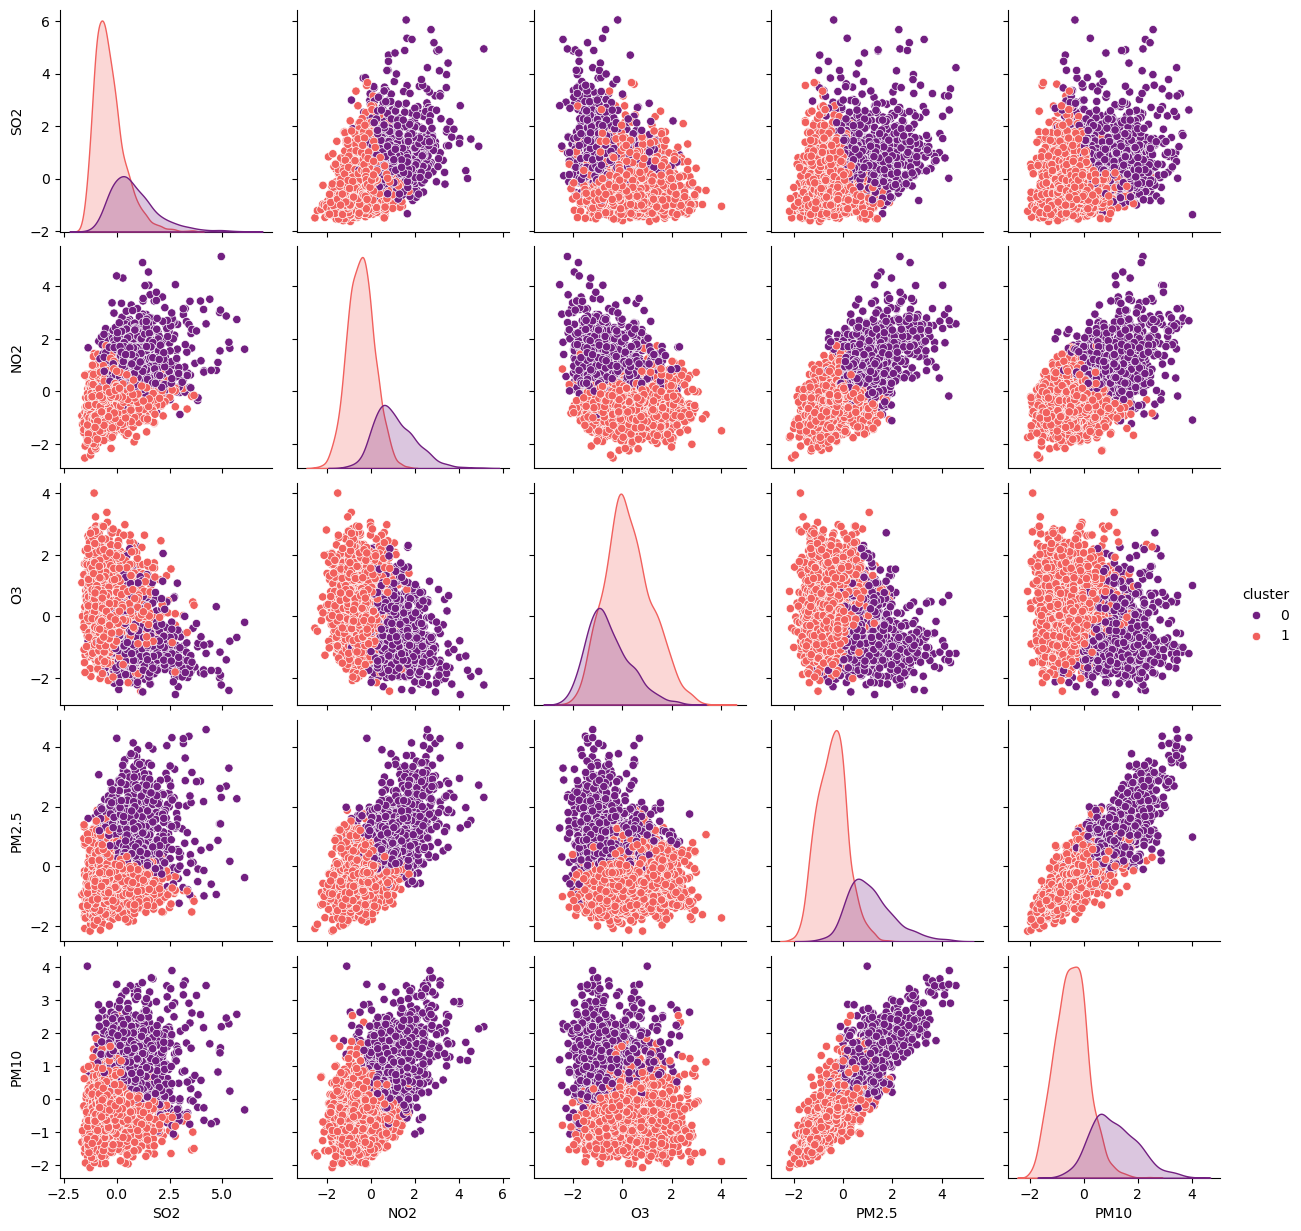

In [1099]:
#Clustering plot for all columns
sns.pairplot(scaled_df, hue="cluster", palette="magma")
plt.savefig("clustering.png", dpi=300, bbox_inches="tight")
plt.show()

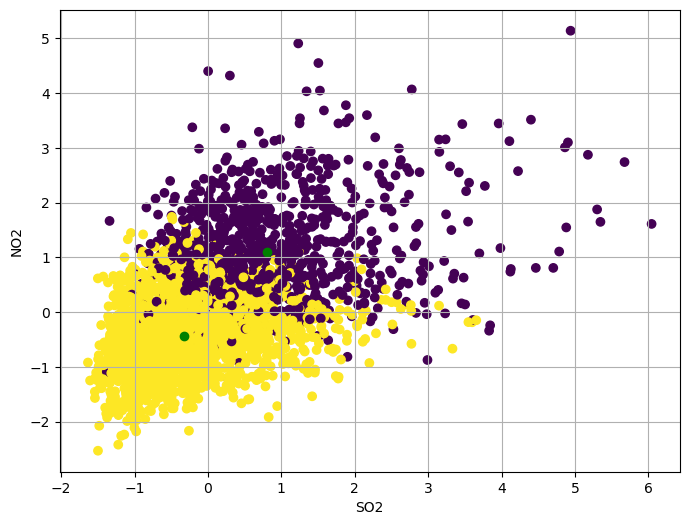

In [1101]:
#Clustering plot for column 1 and 2 with centriods displayed
plt.figure(figsize=(8,6))
# plt.subplot(1,2,1)
plt.scatter(scaled_df["SO2"],scaled_df["NO2"],c = predictions) #scatter plot for the first two columns only
plt.grid(True)

for center in kmeans.cluster_centers_: #Iterating through all cluster centers that we had throughout the process of grouping our data into these two clusters
    plt.scatter(center[0],center[1],marker = "o",c = "green") #plotting the centroids
    plt.xlabel("SO2")
    plt.ylabel("NO2")

In [1105]:
scaled_df.to_excel("air_pollution_clusters.xlsx") #saving an excel file that has the dataframe and clusters

## Double checking for multiple clusters
Let us verify and see how the data would look like if we had chosen cluster 1 - 5. This will confirm if choosing cluster 2 was the right choice or not.

In [1107]:
for k in range(1,6):
    kmeans = cluster.KMeans(n_clusters = k)
    kmeans.fit(scaled_df[["SO2", "NO2"]])
    scaled_df[f"cluster{k}"] = kmeans.labels_
scaled_df

,SO2,NO2,O3,PM2.5,PM10,cluster,cluster1,cluster2,cluster3,cluster4,cluster5
0,-0.426127,-0.409021,0.089803,-0.064978,-0.177869,1,0,1,2,3,0
1,-0.690861,-0.388203,0.122790,0.789577,0.536793,1,0,1,2,3,0
2,-0.303552,-0.209261,0.775786,-0.072808,-0.075137,1,0,1,2,3,3
3,-0.169311,0.019723,-0.292736,0.450701,0.350071,1,0,1,0,1,3
4,0.127126,-0.433301,-0.196948,-0.738786,-0.671137,1,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
3342,-0.331299,-0.030850,-0.286231,-0.217417,-0.334902,1,0,1,0,3,3
3343,-0.059988,0.039958,-0.111963,0.067100,-0.201712,1,0,1,0,1,3
3344,-0.675113,-0.241833,0.595973,0.719728,-0.028059,1,0,1,2,3,3
3345,-0.795905,-0.162041,-0.413434,-0.214604,-0.258282,1,0,1,2,3,3


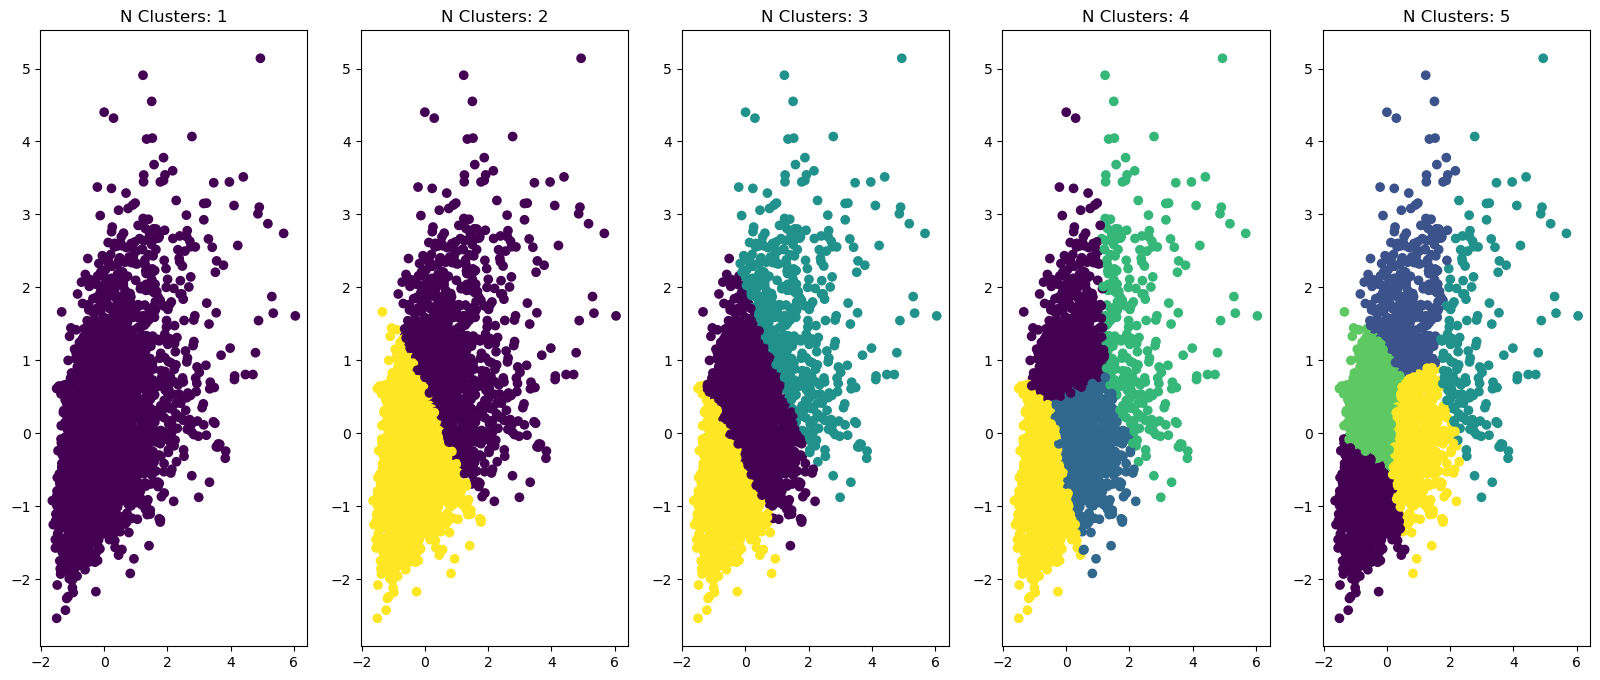

In [1109]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))

for i ,ax in enumerate(fig.axes, start=1):
    ax.scatter(x=scaled_df["SO2"], y=scaled_df["NO2"], c=scaled_df[f"cluster{i}"])
    ax.set_title(f"N Clusters: {i}")

Based on the results above, cluster 1 shows one color hence the data will only be grouped into 1 cluster. In cluster 2 we can see that the data is grouped very well into two different clusters with very little distance between these two clusters. Dividing the data into further clusters provided that when utilizing two clusters the datapoints are still very close to one another is quite useless as the clusters will strongly overlap one another more than they are with 2 clusters. So choosing two clusters is the best choice even if there is some overlap between the two clusters.